References used :-

1)Plotting graphs
https://colab.research.google.com/drive/1L_IMo6v0a0ALK8nefZm6PqPSy0vZIWBT#scrollTo=hyyN-2qyK_T2

2)Baseline code for DQN gym implementation

https://stable-baselines.readthedocs.io/en/master/modules/dqn.html#example

In [0]:
#downloading necessary packages to run code on google colab
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install xvfb
!apt-get update && apt-get install cmake libopenmpi-dev python3-dev zlib1g-dev
!pip install stable-baselines
!apt-get install -y python-numpy python-dev cmake zlib1g-dev libjpeg-dev xvfb xorg-dev python-opengl libboost-all-dev libsdl2-dev swig



Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.2).
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [83.2 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Fetched 247 kB in 2s (159 kB/s)
Readi

In [0]:
#importing other necessary libraries
!pip install pyvirtualdisplay
!pip install gym
!pip install "gym[atari]"
!pip install piglet

In [0]:
import os
import gym
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display as ipythondisplay 
from pyvirtualdisplay import Display
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.deepq.policies import MlpPolicy, LnMlpPolicy
from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy
#Libraries to run DQN for gym environment
from stable_baselines import DQN  

In [0]:
best_mean_reward, n_steps = -np.inf, 0
#function to determine optimum policy and check best action by looking at previous experiences
def callback(_locals, _globals):
    global n_steps, best_mean_reward
    # display agent stats after every 1000 steps
    if (n_steps + 1) % 1000 == 0:
        # Verifying with earlier policies experienced by the agent
        x, y = ts2xy(load_results(log_dir), 'timesteps')
        if len(x) > 0:
            mean_reward = np.mean(y[-100:])
            print(x[-1], 'timesteps')
            if mean_reward > best_mean_reward:
                best_mean_reward = mean_reward
                # if a new optimum model is obtained , print it in the console
                print("Saving new best model at %d"%x[-1])
    n_steps += 1
    return True

In [0]:
display = Display(visible=0, size=(400, 300))
display.start()

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [0]:
# Creating log directory
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)
#selecting Mountain car environment for agent
env = gym.make('MountainCar-v0')
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])
#Defining the reinforcement model with layer normalized multi layer perceptron policy
model = DQN(LnMlpPolicy, env, verbose=1)
#training the model for set number of steps
model.learn(total_timesteps=50000, callback=callback)
model.save("Gym1")
#deleting model to load it in next cell
del model


/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
800 timesteps
Saving new best model at 800
1800 timesteps
2800 timesteps
3800 timesteps
4800 timesteps
5800 timesteps
6800 timesteps
7800 timesteps
8800 timesteps
9800 timesteps
10800 timesteps
11800 timesteps
12800 timesteps
13800 timesteps
14800 timesteps
15800 timesteps
16997 timesteps
Saving new best model at 16997
17997 timesteps
18997 timesteps
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 100      |
| mean 100 episode reward | -200     |
| steps                   | 19796    |
--------------------------------------
19997 timesteps
20997 timesteps
21995 timesteps
Saving new best model at 21995
22947 timesteps
Saving new best model at 22947
23935 timesteps
Saving new best model at 23935
24946 timesteps
Saving new best model at 24946
25927 timesteps
Saving new best model at 25927
26867 timesteps
Saving new best model at 26867


In [0]:
def movingAverage(values, window):
    """
    Smooth values by doing a moving average
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, 'valid')

  #function to plot the results
def plot_results(log_folder, title='Learning Curve'):
    x, y = ts2xy(load_results(log_folder), 'timesteps')
    y = movingAverage(y, window=50)
    # Truncate x
    x = x[len(x) - len(y):]
    fig = plt.figure(title)
    plt.plot(x, y)
    plt.xlabel('Timestep Count')
    plt.ylabel('Reward')
    plt.title(title + " Smoothed")
    plt.show()

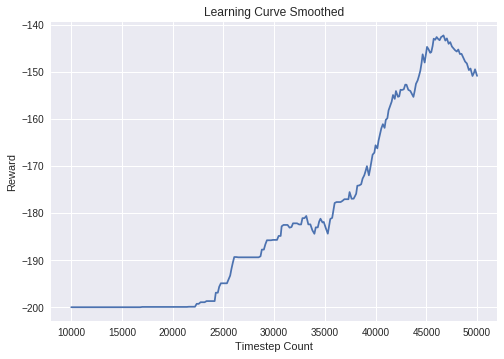

In [0]:
#plotting the results after training the DQN model
plot_results(log_dir)

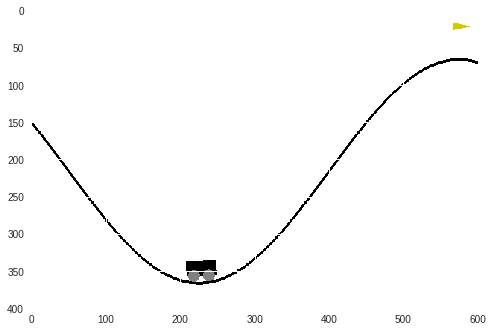

In [0]:
#predicting steps based on the trained data and displaying output using plot.
model = DQN.load("Gym1")
obs = env.reset()

for i in range(500):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    screen = env.render(mode='rgb_array')
    #showing output image for every iteration
    plt.imshow(screen)
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())

    
ipythondisplay.clear_output(wait=True)
env.close()

In [0]:
display.stop()